In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('highschoolmoms_final.xlsx')

In [3]:
df['datetime'] = pd.to_datetime(df['Datetime'])

In [4]:
df['date'] = df['datetime'].dt.date
df['day_of_week'] = df['datetime'].dt.day_name()
df['week'] = df['datetime'].dt.isocalendar().week
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [5]:
# Count of reels posted per day
daily_counts = df['date'].value_counts().sort_index()

In [6]:
# Count of reels posted per week
weekly_counts = df.groupby(['year', 'week']).size()

In [7]:
# Count of reels posted per month
monthly_counts = df.groupby(['year', 'month']).size()

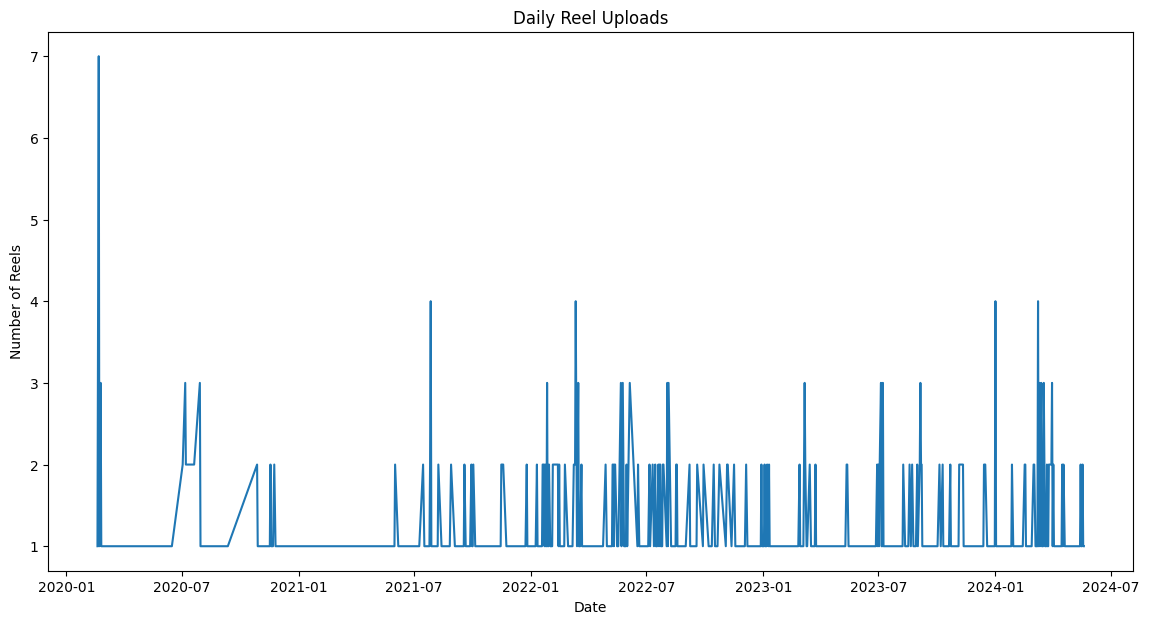

In [10]:
# Daily uploads
plt.figure(figsize=(14, 7))
daily_counts.plot(kind='line')
plt.title('Daily Reel Uploads')
plt.xlabel('Date')
plt.ylabel('Number of Reels')
plt.show()

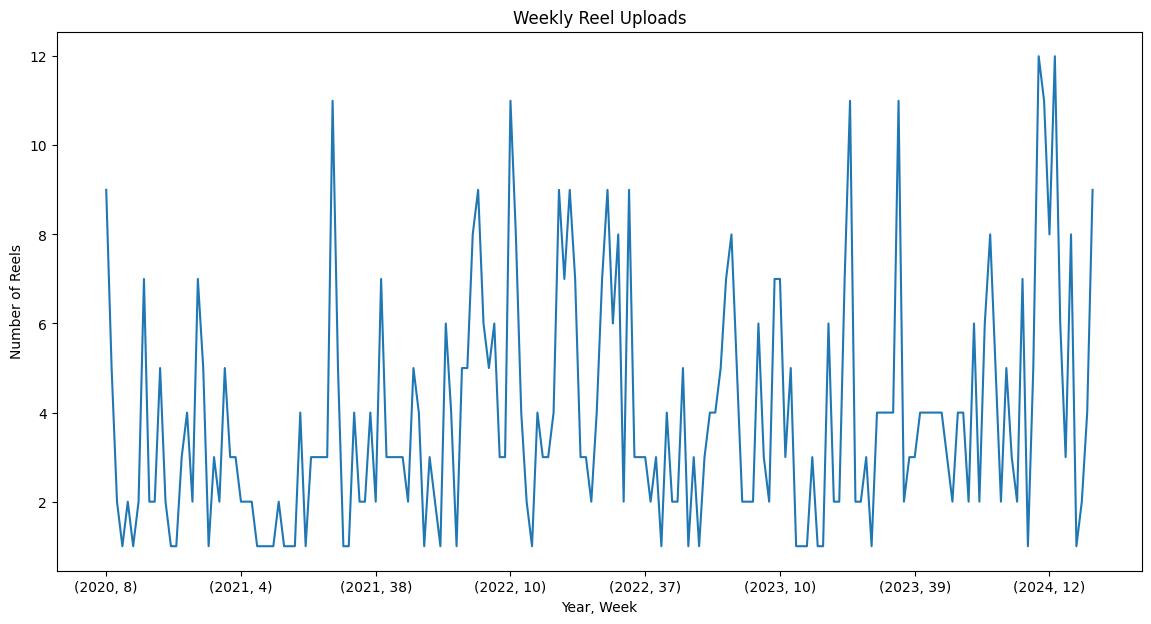

In [11]:
# Weekly uploads
plt.figure(figsize=(14, 7))
weekly_counts.plot(kind='line')
plt.title('Weekly Reel Uploads')
plt.xlabel('Year, Week')
plt.ylabel('Number of Reels')
plt.show()

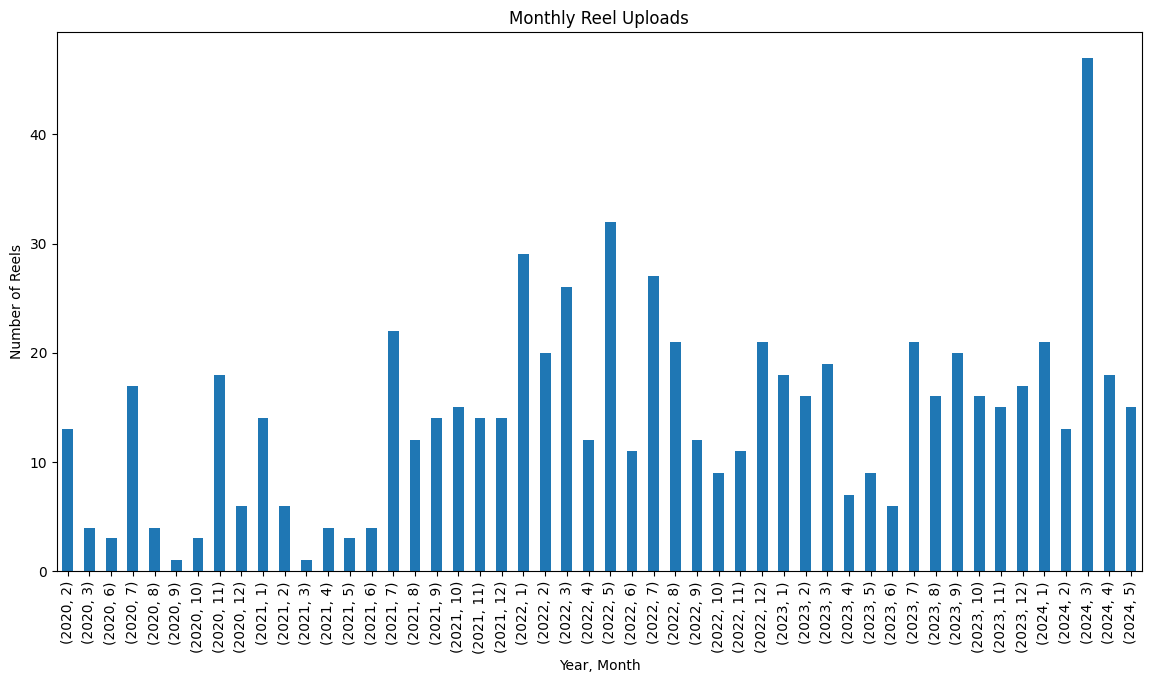

In [12]:
# Monthly uploads
plt.figure(figsize=(14, 7))
monthly_counts.plot(kind='bar')
plt.title('Monthly Reel Uploads')
plt.xlabel('Year, Month')
plt.ylabel('Number of Reels')
plt.show()

In [13]:
# Additional Analysis: Uploads by Day of the Week
day_of_week_counts = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [17]:
num_weeks = len(df['datetime'].dt.to_period('W').unique())

In [18]:
average_day_of_week_counts = day_of_week_counts / num_weeks

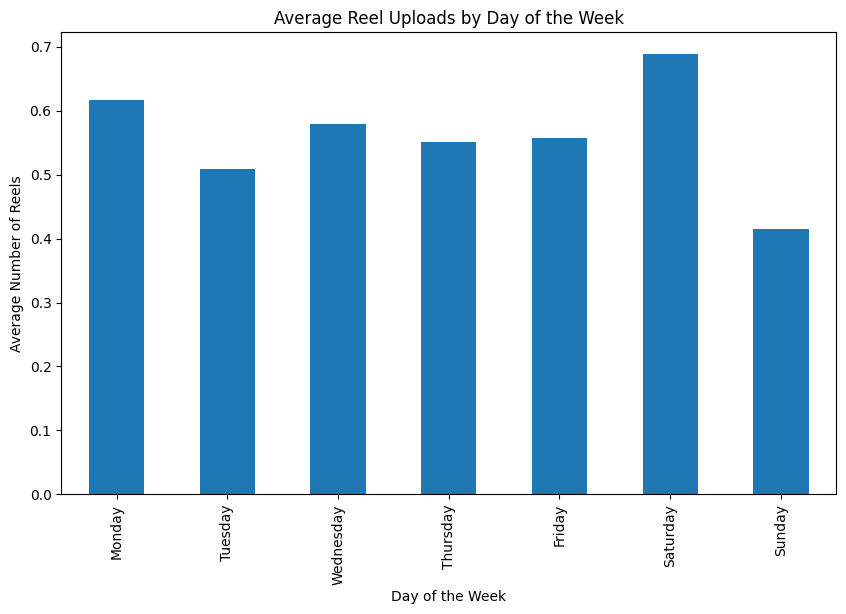

In [19]:
plt.figure(figsize=(10, 6))
average_day_of_week_counts.plot(kind='bar')
plt.title('Average Reel Uploads by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Reels')
plt.show()

In [15]:
# Additional Analysis: Uploads by Hour of the Day
df['hour'] = df['datetime'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()


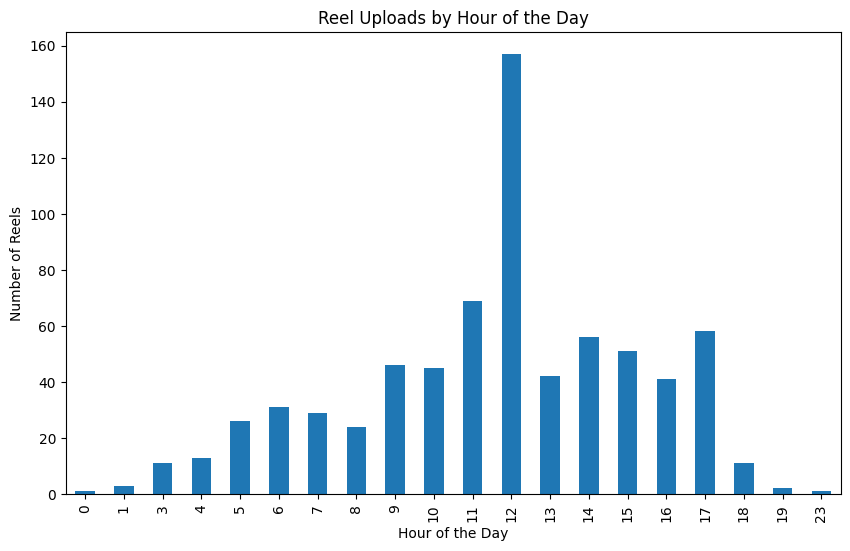

In [16]:
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.title('Reel Uploads by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Reels')
plt.show()